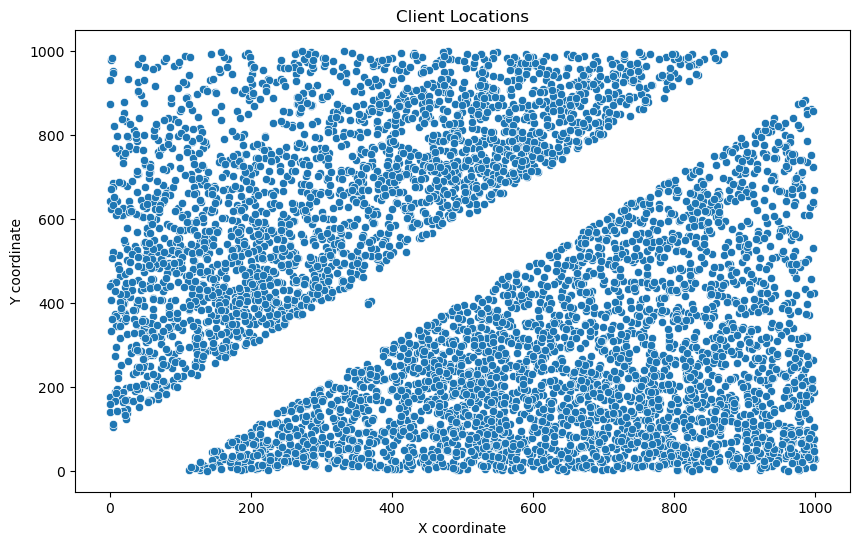

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Import dataset Drone cust locations
df = pd.read_csv('../data/drone_cust_locations.csv', sep=';')

# Import dataset Drone production groups
df2 = pd.read_csv('../data/drone_prod_groups.csv')

# Drop client id column
df = df.drop(columns='clientid')

# Plot client locations
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['x'], y=df['y'])
plt.title('Client Locations')
plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')
plt.show()

In [53]:
# Number of depots
n_clusters = 4

# Model fit
model = KMeans(init='random', n_clusters=n_clusters, random_state=43)
model.fit(df)


KMeans(init='random', n_clusters=4, random_state=43)

In [54]:
# Get the cluster labels and centroids
labels = model.labels_
centroids = model.cluster_centers_

# Add depot info to dataframe
df['depot'] = labels

print(df.head(10))

            x           y  depot
0  622.771572  164.857623      2
1  416.357298  630.193634      3
2  292.735020  567.333231      0
3  737.211288  166.225676      1
4  540.475375  682.912298      3
5  535.469492  318.439661      2
6  640.380050  870.833221      3
7  235.772075  359.048203      0
8  481.896884  661.491838      3
9  730.032789  312.177817      1


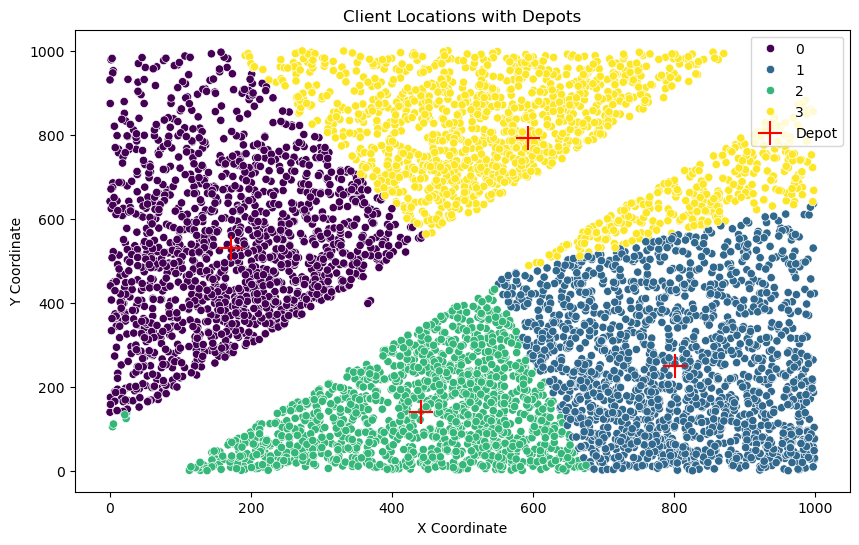

In [55]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['x'], y=df['y'], hue=df['depot'], palette='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='+', label='Depot')
plt.title('Client Locations with Depots')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.legend()
plt.show()

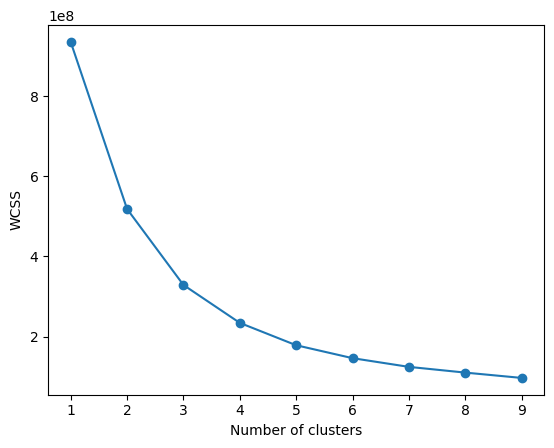

In [56]:
import matplotlib.pyplot as plt

# Clustered dataset with different k values
wcss = []
for i in range(1,10):
    model = KMeans(init='random', n_clusters=i, random_state=45).fit(df)
    wcss.append(model.inertia_)

plt.plot(range(1,10), wcss, 'o-')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [57]:
import time

# Function to fit k-means and measure computation time
def fit_kmeans(clusters):
    start_time = time.time()
    mod = KMeans(init='random', n_clusters=clusters, random_state=42)
    mod.fit(df)
    end_time = time.time()
    return mod.cluster_centers_, end_time - start_time

# Test with different number of depots
for n in [3, 5, 10]:
    centroids, duration = fit_kmeans(n)
    print(f'Number of depots: {n}, Computation time: {duration:.4f} seconds')
    print(f'Centroids:\n{centroids}\n')

Number of depots: 3, Computation time: 0.0607 seconds
Centroids:
[[5.48891112e+02 7.87516069e+02 2.54923798e+00]
 [1.97952693e+02 3.84477007e+02 5.49375709e-01]
 [7.01507220e+02 2.11240080e+02 1.35088424e+00]]

Number of depots: 5, Computation time: 0.0441 seconds
Centroids:
[[1.61665762e+02 4.96425181e+02 7.38007380e-03]
 [4.37552149e+02 1.48273941e+02 1.97207547e+00]
 [8.04487179e+02 1.52083023e+02 1.04987102e+00]
 [4.87897621e+02 8.25488913e+02 2.61418550e+00]
 [8.07404703e+02 5.31834091e+02 1.78313253e+00]]

Number of depots: 10, Computation time: 0.0469 seconds
Centroids:
[[8.81102184e+02 6.35218208e+02 2.37373737e+00]
 [4.52311944e+02 7.67480218e+02 2.81452859e+00]
 [7.32737461e+02 4.01799731e+02 1.20424837e+00]
 [3.08100798e+02 8.73222567e+01 2.00000000e+00]
 [8.49630709e+02 1.28412048e+02 1.00000000e+00]
 [6.48685751e+02 8.95594425e+02 3.00000000e+00]
 [1.07447469e+02 3.65004309e+02 1.74216028e-02]
 [1.52867694e+02 7.99889477e+02 4.97560976e-01]
 [5.47017165e+02 1.71366385e+02 

In [58]:
from sklearn.cluster import AgglomerativeClustering

# Function to fit agglomerative clustering and measure computation time
def fit_agglomerative(clusters):
    start_time = time.time()
    mod = AgglomerativeClustering(n_clusters=clusters)
    label = mod.fit_predict(df)
    end_time = time.time()
    return label, end_time - start_time

# Test with different number of depots
for n in [3, 5, 10]:
    labels, duration = fit_agglomerative(n)
    print(f'Number of depots: {n}, Computation time: {duration:.4f} seconds')
    df['depot'] = labels
    print(df.head(10))

Number of depots: 3, Computation time: 1.1243 seconds
            x           y  depot
0  622.771572  164.857623      0
1  416.357298  630.193634      2
2  292.735020  567.333231      2
3  737.211288  166.225676      0
4  540.475375  682.912298      1
5  535.469492  318.439661      0
6  640.380050  870.833221      1
7  235.772075  359.048203      2
8  481.896884  661.491838      2
9  730.032789  312.177817      0
Number of depots: 5, Computation time: 0.8447 seconds
            x           y  depot
0  622.771572  164.857623      3
1  416.357298  630.193634      0
2  292.735020  567.333231      0
3  737.211288  166.225676      3
4  540.475375  682.912298      4
5  535.469492  318.439661      1
6  640.380050  870.833221      4
7  235.772075  359.048203      0
8  481.896884  661.491838      0
9  730.032789  312.177817      1
Number of depots: 10, Computation time: 0.8057 seconds
            x           y  depot
0  622.771572  164.857623      3
1  416.357298  630.193634      0
2  292.73502

In [59]:
from sklearn.metrics import silhouette_score

# Silhouette score
model = KMeans(init='random', n_clusters=5, random_state=42).fit(df)
labels = model.labels_
print('Silhouette score = %.2f' % silhouette_score(df, labels))

Silhouette score = 0.42
